# **BLOC 3: First assignment (Solving a 'Gaussian' 10-bandit problem)**

*Carla Barceló Sàbat and Laura Malo Roset *

The goal of this homework is to create a policy able to get the maximum reward playing a 10-armed bandit. Each of the ten arms reward R_i is selected following a normal distribution with mean zero and unit variance. Each time arm $i$ is pulled, the bandit outputs a reward selected according to a mean R_i unit variance normal distribution. Follow these steps:

**a) **Create a policy based in the incremental implementation to solve the given 10-armed bandit. Train it over 1000 episodes. Plot the results

**b)** Run the previous code 2000 runs, where at each round you reinitialize the environment and policy. Plot the average reward obtained as a function of the episode number.

**c)** Apply now the e-greedy algorithm, for e = [0.1, 0.01]. Do the two previous steps for each value of e and compare the results obtained.

The function creating the multi-armed bandit can be found in RL/MBA.py

# Introduction

The aim os this assigment is to create a code that solves a 'Gaussian' 10-dandit problem. 
A 10-bandit problem consists in a 10 armed bandit which the reward of the selected bandit at each step is determined by a gaussian distribution. 

The code is structured as it follows, the first part corresponds to the definition of the class MAB which will be our agent and will include all definitions we will need (i.e., the actions). And the second part of the code, or main code, will be the declaration of variables and the loops that will compute the different runs of the code and finally will plot the results obtained. 








**1. Agent definition:**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

class MAB:
  ''' Creates a multiarmed bandit where each bandit outputs a reward coming 
  from a Gaussian distribution. '''
  
  def __init__(self, num_b, eps, episode):
    #inizialize all the variables the agent will work with
    self.N = num_b # Number of bandits
    self.prob_b = np.random.normal(0, 1, self.N) #Reward probability of each bandit
                                                 #Follows a normal distribution
    self.eps = eps #epsilon for the e-greedy algorithm 
    self.episode = episode  # Number of episodes
    self.n = 0  #step count 
    self.n_b = np.zeros(num_b) # Step count for each bandit, it's a vector(0-9 bandits)
    self.mean_reward = 0  # Total mean reward
    self.reward = np.zeros(episode)  # Mean reward for each episode
    self.N_reward = np.zeros(num_b) # Reward for each bandit (usefull for the e-greedy algorithm)

          
  def get_reward(self, action):
    # Given action, outputs a reward based on the probability of success of bandit
    if action > self.N-1:
      print('Bandit number'+str(action)+' does not exists!')
      return 0
    else: 
      reward = np.random.normal(self.prob_b[action],1)
      return reward
  
  def pull_bandit(self):
    #e-GREEDY ALGORITHM
    #Choose a certain probability
    p=np.random.rand()
    #considering the case of greedy and the first step, we randomly choose an action 
    if self.eps ==0 and self.n == 0: 
      action = np.random.choice(self.N)
    #if the probability chosen is lower than the eps (for eps=0.1 or 0.01) we choose a random action
    elif p< self.eps: 
      action = np.random.choice(self.N)
    #in the other cases, we choose the action with the maximum reward
    else: 
      action = np.argmax(self.N_reward) 
    
    #we get the reward for the action
    reward= self.get_reward(action)
    
    # Update counters
    self.n += 1
    self.n_b[action] += 1
        
    # Update total mean value of the reward (Qa)
    self.mean_reward = self.mean_reward + (
        reward - self.mean_reward) / self.n
        
    # Update reward for the given action (Qa(action))
    self.N_reward[action] = self.N_reward[action] + (
        reward - self.N_reward[action]) / self.n_b[action]

  def run(self):
  #we pull the bandits a certain number of episodes 
     for i in range(self.episode):
        self.pull_bandit()
        self.reward[i] = self.mean_reward



** 2. Main code **

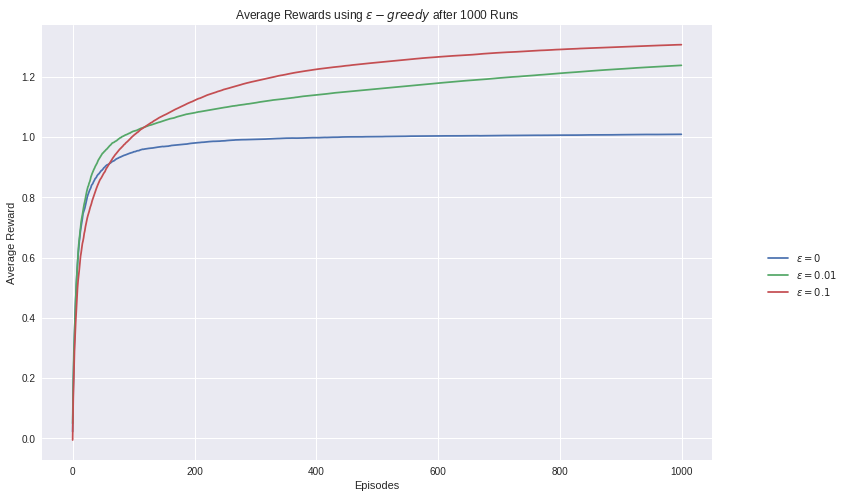

In [0]:
# To create the environment use:
number_bandits = 10
episodes = 1000

#We inicialize variables to compute the avarage in a total number of runs
MAB_0_rewards = np.zeros(episodes)
MAB_01_rewards = np.zeros(episodes)
MAB_001_rewards = np.zeros(episodes)


runs = 1000
# Run 'runs' time the code
for i in range(runs):    
    # Initialize three bandit problems for eps=0,0.1 and 0.001 
    #As we create the enviroment inside, each run will reset the variables
    MAB_0 = MAB(number_bandits, 0, episodes)
    MAB_01 = MAB(number_bandits, 0.1, episodes)
    MAB_001 = MAB(number_bandits, 0.01, episodes)
    
    # Run each epsilon problem
    MAB_0.run()
    MAB_01.run()
    MAB_001.run()
    
    # Averages for the runs
    MAB_0_rewards = MAB_0_rewards + (MAB_0.reward - MAB_0_rewards) / (i + 1)
    MAB_01_rewards = MAB_01_rewards + (MAB_01.reward - MAB_01_rewards) / (i + 1)
    MAB_001_rewards = MAB_001_rewards + (MAB_001.reward - MAB_001_rewards) / (i + 1)
    

#Plot the results
plt.figure(figsize=(12,8))
plt.plot(MAB_0_rewards, label="$\epsilon=0$ ")
plt.plot(MAB_001_rewards, label="$\epsilon=0.01$")
plt.plot(MAB_01_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2,0.5))
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards using $\epsilon-greedy$ after " + str(runs) + " Runs")
plt.show()

# **Results**

As we can see in graph shown, during the first episodes the Average Reward is very low but quickly increases and after a reasanable number of episodes (as could be for example, 600 episodes) the reward starts to become constant which mean that the bandit has learn which are the correct moves to obtain the maximum reward. 

The $\epsilon$-greedy method consistis in combining exporation and reward, which means that if $\epsilon$ =0 the only goal of our agent will be to get the maximum reward but if it's a value different to zero we will include for our agent that tries to explore all the possible combinations and not only stick to the most rewarded that has already been explored. 

If we look at the results, we can see how if we explore all the possibilities, after a certain number of episodes the Average Reward will be better. In particular, it turns out that the best results are obtained for $\epsilon=0.1$.
